In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
tf.__version__

'2.12.0'

**Creating** data to view and fit


In [ ]:
from sklearn.datasets import make_circles
# make 1000 examples
n_samples = 1000
# create circles
X,y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [ ]:
#  chec out features (independent variables)
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# check the labels (dependent variables)
y.shape

(1000,)

In [ ]:
#  lets visualize
circles = pd.DataFrame({"X0": X[:,0], "X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


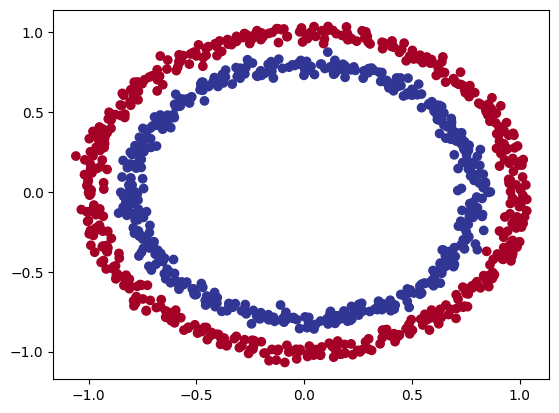

In [ ]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c= y ,cmap = plt.cm.RdYlBu);

In [ ]:
# c: It represents the color values or categories that will be mapped to the colormap specified by cmap. Each data point in the scatter plot is assigned a color based on its corresponding value in the c parameter. In the code snippet, y is used as the c parameter, which indicates that the color of each point is determined by the values in the y variable. Different values in y will be assigned different colors according to the colormap specified by cmap.

# In summary, the cmap parameter defines the color map used in the plot, while the c parameter specifies the values or categories that determine the colors assigned to each point in the scatter plot.

## Input and output shapes

In [ ]:
#  check the shapes
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
#  no of samples
len(X), len(y)

(1000, 1000)

In [ ]:
#  view first ex
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

##Steps in Modelling

In [ ]:

# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(tf.expand_dims(X, axis = -1),y, epochs = 10)

Epoch 1/10
32/32 [==============================] - 5s 6ms/step - loss: 3.8747 - accuracy: 0.4957
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.9967 - accuracy: 0.4999
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7217 - accuracy: 0.4964
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7021 - accuracy: 0.4987
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6964 - accuracy: 0.5013
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.4997
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4934
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.4895
Epoch 9/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.4869
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5031


In [ ]:
#  lets improve by trainijng for longer

In [ ]:
model_1.fit(tf.expand_dims(X, axis = -1),y, epochs = 200, verbose = 0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.693464994430542, 0.5]

In [ ]:
# lets try and add more layers

In [ ]:
# seed
tf.random.set_seed

# create
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),

])

#  compiole
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)

# fit
model_2.fit(tf.expand_dims(X,axis =-1),y,epochs =100 ,verbose =0 )

In [ ]:
model_2.evaluate(X,y)  # always fit on train datra and evaluate on test data

32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5000


[0.6948521733283997, 0.5]

In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

In [ ]:
#  so our models just guessing with 50% accuracy

## Imporving our model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data
model_3.fit(tf.expand_dims(X,axis =-1),y,epochs =100 ,verbose =0 )

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 2.4005 - accuracy: 0.4570
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7120 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6976 - accuracy: 0.4940
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6946 - accuracy: 0.4480
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.5080
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4400
Epoch 11/

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5140


[0.6940220594406128, 0.5139999985694885]

In [ ]:
# Creating a function to view our model's not so good predictions

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

Takes in a trained model, features (X) and labels (y).
Creates a meshgrid of the different X values.
Makes predictions across the meshgrid.
Plots the predictions as well as a line between the different zones (where each unique class falls).

In [ ]:

import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5140


[0.6940220594406128, 0.5139999985694885]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


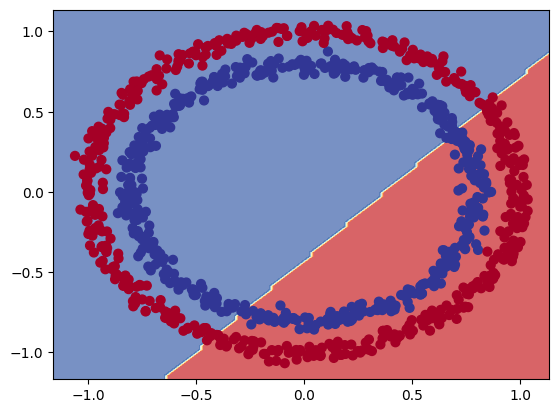

In [ ]:

# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),y_reg_train,epochs=100 , verbose =0)

ValueError: ignored

In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['mae'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 380.4882 - mae: 380.4882
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 270.8106 - mae: 270.8106
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 162.3744 - mae: 162.3744
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 56.6927 - mae: 56.6927
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 73.9939 - mae: 73.9939
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 80.9407 - mae: 80.9407
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 51.8882 - mae: 51.8882
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 50.0207 - mae: 50.0207
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 46.7887 - mae: 46.7887
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 44.1745 - mae: 44.1745
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 7ms/step


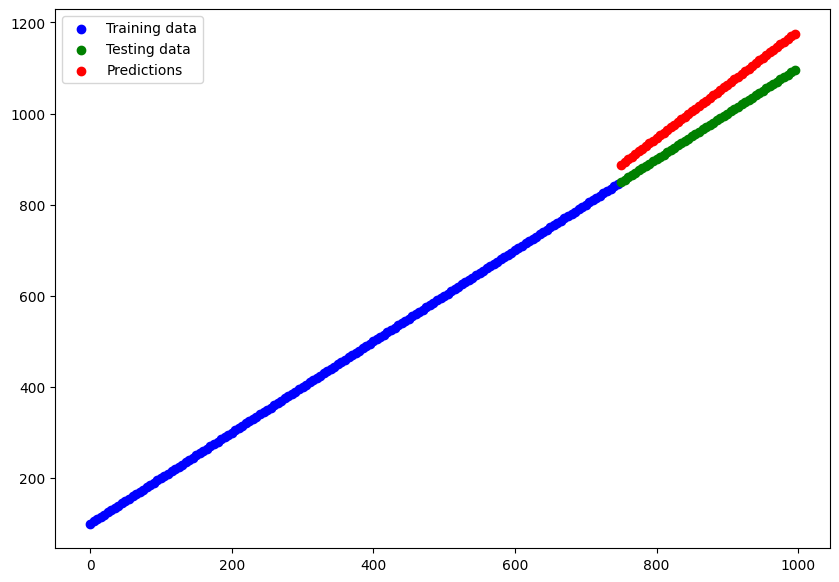

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();


##The missing piece: NON-LINEARITY

In [ ]:

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.2020 - accuracy: 0.5008
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1085 - accuracy: 0.5005
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0044 - accuracy: 0.5010
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9438 - accuracy: 0.4997
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 3.8982 - accuracy: 0.4995
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7991 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6890 - accuracy: 0.4985
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 3.5857 - accuracy: 0.5004
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 3.5217 - accuracy: 0.4983
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 3.4719 - accuracy: 0.4983
Epoch 11/

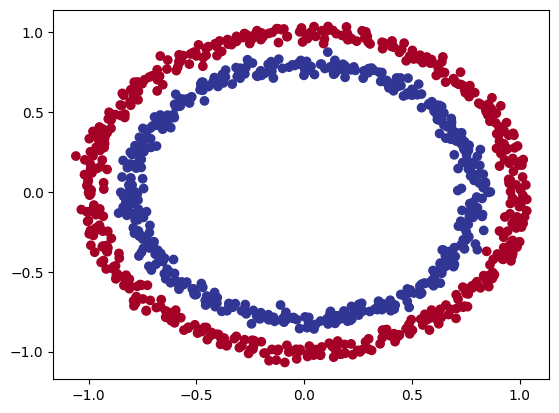

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y , cmap= plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


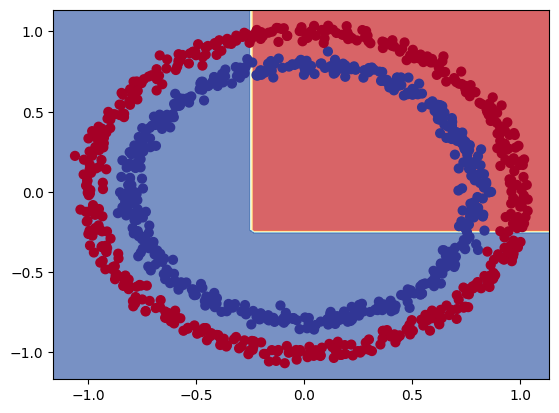

In [ ]:
plot_decision_boundary(model =model_4,X= X,y=y)

##Build a neural network with non linear activation

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(tf.expand_dims(X,axis =-1), y, epochs=100,verbose=0)

In [ ]:
# /tweaking it further

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model

model_6.fit(tf.expand_dims(X,axis =-1), y, epochs=250 , verbose =0)

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5020


[0.6931069493293762, 0.5020312666893005]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


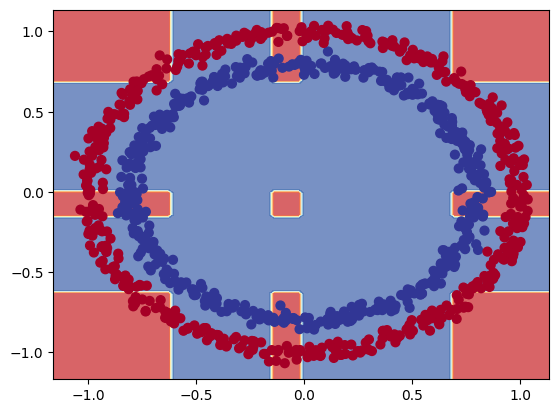

In [ ]:
plot_decision_boundary(model_6,X,y)

In [ ]:
from sklearn.datasets import make_circles
# make 1000 examples
n_samples = 1000
# create circles
X,y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1 , activation ='sigmoid') # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


# Fit the model
model_7.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)


ValueError: ignored

In [ ]:
model_7.evaluate(X,y)

ValueError: ignored

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


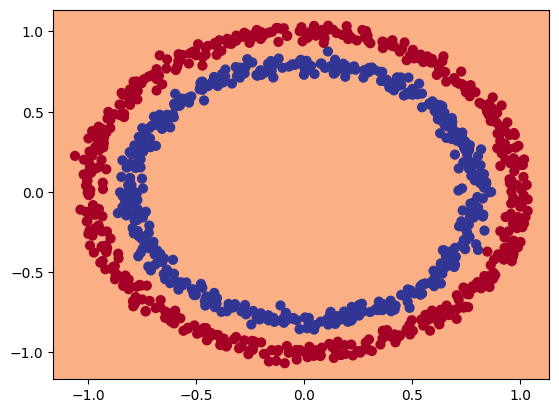

In [ ]:
plot_decision_boundary(model_7,X,y)

In [ ]:

print(tf.expand_dims(X,axis=-1).shape)

(1000, 2, 1)


In [ ]:
print(tf.expand_dims(y,axis=-1).shape)

(1000, 1)


In [ ]:
X.shape

(1000, 2)

In [ ]:
y.shape

(1000,)

In [ ]:
# create a toy tensor (similar to the data er passed i our model)

In [ ]:
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

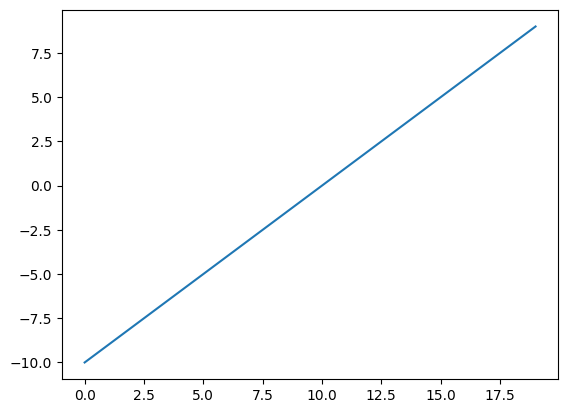

In [ ]:
#  visualize
plt.plot(A)

In [ ]:
#  start by replicating sigmoid
def sigmoid(x):
  return 1/ (1+ tf.exp(-x))

# use func
B = sigmoid(A)


In [ ]:
y.shape,len(y)

((1000,), 1000)

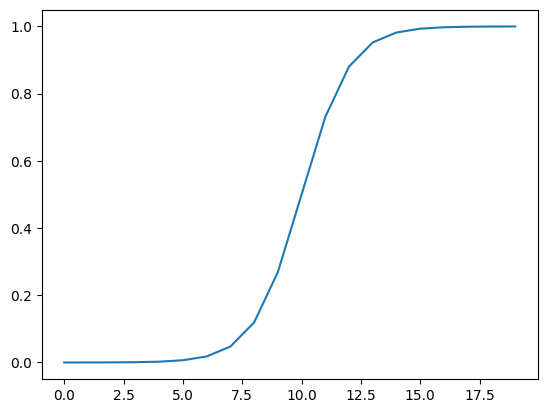

In [ ]:
plt.plot(B)

In [ ]:
def relu(x):
  return tf.maximum(0,x)

#  pass value
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

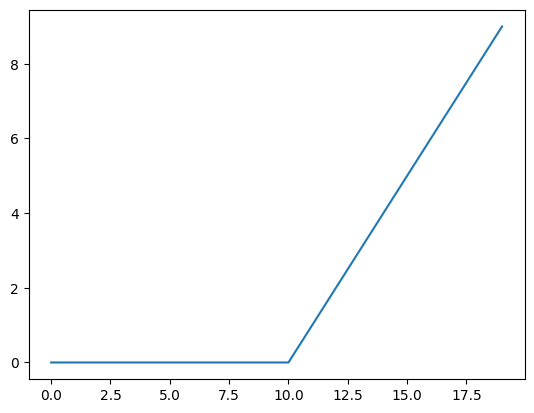

In [ ]:
plt.plot(relu(A))

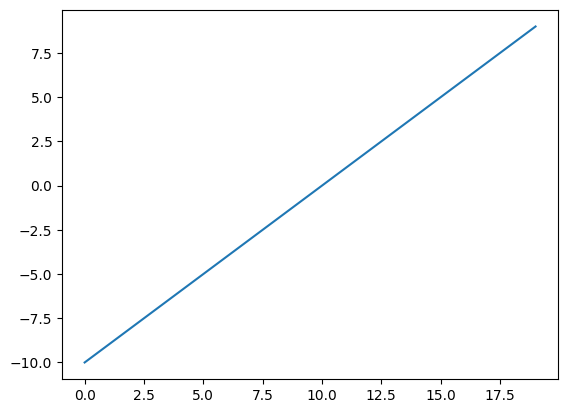

In [ ]:
# lets try linear
def linear(x):
  return x

plt.plot(linear(A))

In [ ]:
# doest change anything

##Imporving and EValuating our classification modelMM

In [ ]:
# lets create traininga nd test set
len(X) ,len(y)
from sklearn.datasets import make_circles
# make 1000 examples
n_samples = 1000
# create circles
X,y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.1)
X_train.shape , X_test.shape

((900, 2), (100, 2))

In [ ]:
# seed
tf.random.set_seed(42)

# create
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation ='relu'),
    tf.keras.layers.Dense(4, activation ='relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])

# compile
model_8.compile(
    loss = 'binary_crossentropy',
    optimizer= tf.keras.optimizers.Adam(lr=0.01),
    metrics = ['accuracy']
)


# fit
hsitroy =model_8.fit(tf.expand_dims(X_train, axis =-1),y_train,epochs=25)


Epoch 1/25


ValueError: ignored

In [ ]:
model_8.evaluate(X_test,y_test)

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_8,X_test,y_test)
plt.show()

In [ ]:
pd.DataFrame(history.history)

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves")

In [ ]:
# my model sucks

##Finding the best learning rate


In [ ]:
# To do so, we're going to use the following:

# A learning rate callback.
# You can think of a callback as an extra piece of functionality you can add to your model while its training.
# Another model (we could use the same ones as above, we we're practicing building models here).
# A modified loss curves plot.

In [ ]:
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history_9 = model_9.fit(tf.expand_dims(X_train,axis =-1),
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler],verbose=0)

In [ ]:
pd.DataFrame(history_9.history)

In [ ]:
pd.DataFrame(history_9.history).plot(figsize = (10,7), xlabel = 'epochs')

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
len(lrs)

In [ ]:

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])



# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=20)

Epoch 1/20


ValueError: ignored

In [ ]:

# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

ValueError: ignored

In [ ]:
model_8.evaluate(X_test, y_test)

In [ ]:
# plot
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_10,X_test,y_test)

In [ ]:
# Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

# Metric name/Evaluation method	Defintion	Code
# Accuracy	Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct.	sklearn.metrics.accuracy_score() or tf.keras.metrics.Accuracy()
# Precision	Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0).	sklearn.metrics.precision_score() or tf.keras.metrics.Precision()
# Recall	Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives.	sklearn.metrics.recall_score() or tf.keras.metrics.Recall()
# F1-score	Combines precision and recall into one metric. 1 is best, 0 is worst.	sklearn.metrics.f1_score()
# Confusion matrix	Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).	Custom function or sklearn.metrics.plot_confusion_matrix()
# Classification report	Collection of some of the main classification metrics such as precision, recall and f1-score.	sklearn.metrics.classification_report()

In [ ]:
loss, accuracy = model_10.evaluate(X_test,y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy * 100):.2f}%")


In [ ]:
y_preds = model_10.predict(X_test)
y_preds = tf.round(y_preds)
cm = confusion_matirx(y_test,y_preds)

4/4 [==============================] - 0s 3ms/step


NameError: ignored

##How about we beautify this matrix

1.   List item
2.   List item



bbb

# WORKING WITH A LARGER MODEL   (mULTI-Class CLassiFICATIOM)

In [ ]:
# when you have more than 2 classes as an option its called multi class classification

In [ ]:
# we are going to build a neural network to classify different images of items of clothing

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#  the data has already been sorted
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#  show first training smaple
print(f"Training data {train_data[0]}\n")
print(f"Training labels: {train_labels[0]}\n")

Training data [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

In [ ]:
#  check shape
train_data[0].shape , train_labels[0].shape

((28, 28), ())

In [ ]:
train_data[900
           ]

array([[  0,   0,   0,   2,   1,   0,   0,   0,   0,  17, 116,  36,   3,
         12,  17,  28,  75, 132,  30,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  89, 185, 227, 215, 238, 234,
        221, 216, 236, 236, 216, 230, 178,  78,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  19, 229, 211, 205, 198, 195, 190, 188,
        160, 162, 185, 188, 192, 199, 208, 212, 221,  14,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0, 172, 209, 188, 191, 198, 199, 196, 187,
        195, 195, 192, 195, 202, 199, 196, 188, 212, 161,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 193, 199, 192, 199, 196, 194, 196, 194,
        193, 193, 193, 193, 195, 199, 196, 200, 198, 228,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  86, 213, 199, 194, 199, 195, 197, 195, 211,
        212, 210, 221, 218, 196, 197, 190, 208, 193, 207,  53,   0,   0,
          0,   0],
       [  

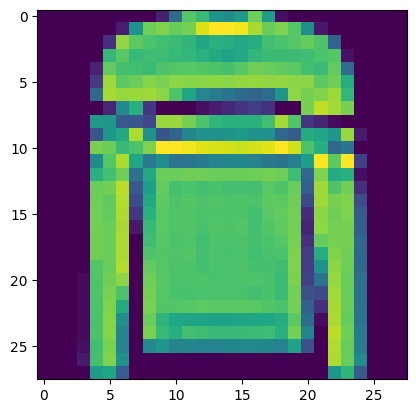

In [ ]:
#  plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[5])

In [ ]:
train_labels[5]

2

In [ ]:
#  create a snall list so we can index our labels so that they are human readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'Dress')

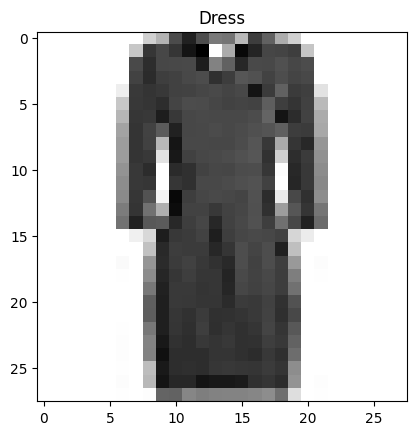

In [ ]:

index = 9000

plt.imshow(train_data[index], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index]])

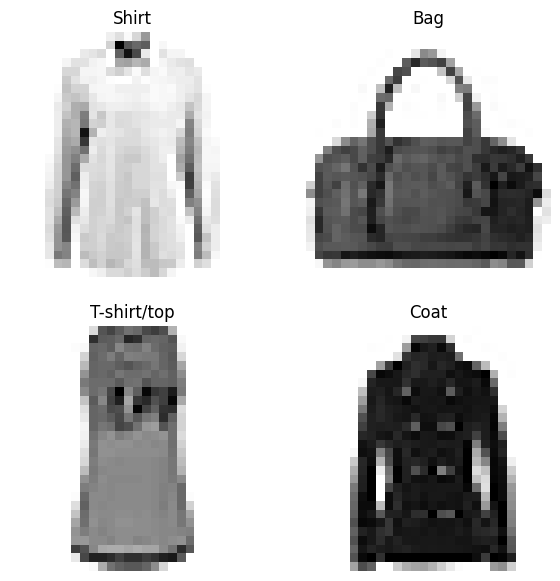

In [ ]:

# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
# # build a multi-class model
# Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

# The input shape will have to deal with 28x28 tensors (the height and width of our images).
# We're actually going to squash the input into a tensor (vector) of shape (784).
# The output shape will have to be 10 because we need our model to predict for 10 different classes.
# We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
# We'll need to change our loss function from a binary loss function to a multiclass loss function.
# More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
# We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(tf.expand_dims(train_data,axis=-1),
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model perfor

Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 2.3354 - accuracy: 0.0960 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy

In [ ]:
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# check miin and mox
train_data.min(), train_data.max()

(0, 255)

nueral networks prefer data to be scaled / normalized that is between 0 and 1

In [ ]:
#  we can do tyhat by dividing by max
train_data_norm = train_data/ 255.0
test_data_norm = test_data/255.0

# check min and max now
train_data_norm.min() ,train_data_norm.max()

(0.0, 1.0)

In [ ]:
#  now since our data is normalized

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(tf.expand_dims(train_data_norm,axis=-1),
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels)) # see how the model perfor

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5174 - accuracy: 0.4351 - val_loss: 1.2395 - val_accuracy: 0.5357
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.1472 - accuracy: 0.5928 - val_loss: 1.0919 - val_accuracy: 0.6346
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0148 - accuracy: 0.6783 - val_loss: 0.9918 - val_accuracy: 0.6890
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9354 - accuracy: 0.7097 - val_loss: 0.9416 - val_accuracy: 0.7115
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8907 - accuracy: 0.7271 - val_loss: 0.9076 - val_accuracy: 0.7269
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8615 - accuracy: 0.7353 - val_loss: 0.9190 - val_accuracy: 0.7244
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8422 - accuracy: 0.7423 - val_loss: 0.8778 - val_accura

 neural networks prfer data to be in numerical normlaized form

<Axes: title={'center': 'Normalized Data'}>

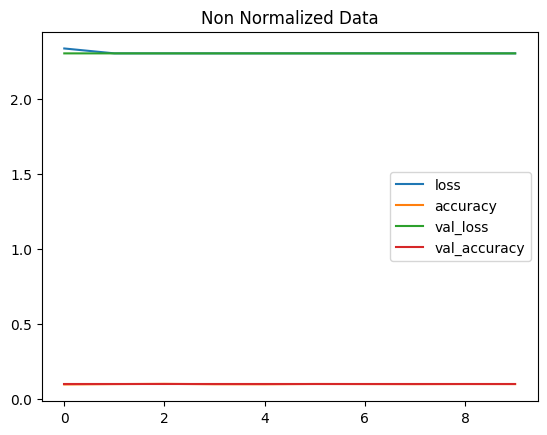

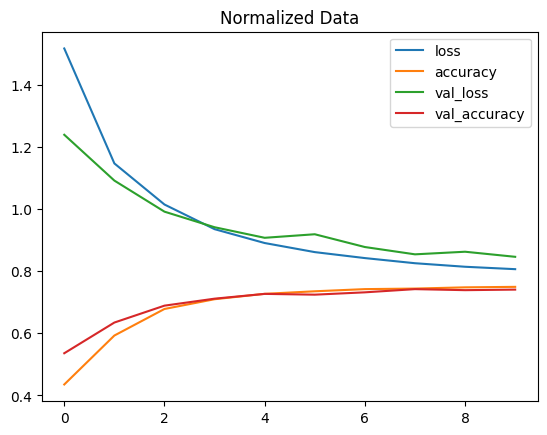

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title = "Non Normalized Data")
pd.DataFrame(norm_history.history).plot(title = "Normalized Data")

The same model with slightly different data can create *dramatically* different results.

 So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

In [ ]:
#  seed
tf.random.set_seed(42)
# create
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation ='relu'),
    tf.keras.layers.Dense(4, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax'),
])

# compile
model_13.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)
# callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(tf.expand_dims(train_data_norm,axis=-1),
                                train_labels,
                                epochs=40,
                                validation_data=(test_data_norm, test_labels),
                               callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3623 - accuracy: 0.5241 - val_loss: 1.0017 - val_accuracy: 0.6614 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8438 - accuracy: 0.7091 - val_loss: 0.7687 - val_accuracy: 0.7296 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6930 - accuracy: 0.7553 - val_loss: 0.7071 - val_accuracy: 0.7444 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6453 - accuracy: 0.7674 - val_loss: 0.6533 - val_accuracy: 0.7656 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6241 - accuracy: 0.7729 - val_loss: 0.6493 - val_accuracy: 0.7681 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6097 - accuracy: 0.7768 - val_loss: 0.6369 - val_accuracy: 0.7688 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

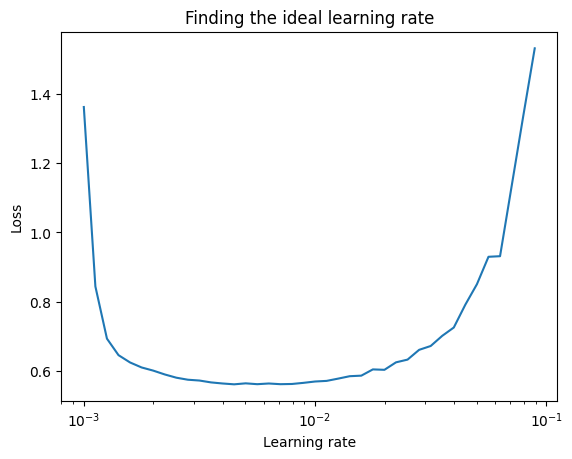

In [ ]:

# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
#  seed
tf.random.set_seed(42)
# create
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation ='relu'),
    tf.keras.layers.Dense(4, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax'),
])

# compile
model_14.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr =0.001),
    metrics = ['accuracy']
)
# callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_14.fit(tf.expand_dims(train_data_norm,axis=-1),
                                train_labels,
                                epochs=20,
                                validation_data=(test_data_norm, test_labels),
                               callbacks = [lr_scheduler])

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1884 - accuracy: 0.5638 - val_loss: 0.8102 - val_accuracy: 0.7018 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7221 - accuracy: 0.7397 - val_loss: 0.7059 - val_accuracy: 0.7537 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6571 - accuracy: 0.7624 - val_loss: 0.6621 - val_accuracy: 0.7633 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6210 - accuracy: 0.7720 - val_loss: 0.6376 - val_accuracy: 0.7731 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5960 - accuracy: 0.7792 - val_loss: 0.6128 - val_accuracy: 0.7765 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5789 - accuracy: 0.7843 - val_loss: 0.6262 - val_accuracy: 0.7761 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 6s

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:

Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
Assess some of its predictions (through visualizations).
Improve its accuracy (by training it for longer or changing the architecture).
Save and export it for use in an application.

In [ ]:
model_14.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6254 - accuracy: 0.7855


[0.625436007976532, 0.7854999899864197]

In [ ]:

# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


In [ ]:
#  make some predictions
y_probs = model_14.predict(test_data_norm)   # probs is short for prediction probabiliteies

# view first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.4775868e-14, 3.6187265e-11, 4.9520093e-22, 6.9413167e-18,
        1.5621382e-18, 2.6528530e-02, 1.9262876e-15, 3.1178474e-01,
        1.0132612e-07, 6.6168666e-01],
       [5.4739537e-08, 2.0850189e-08, 7.8628808e-01, 1.6238843e-06,
        1.9471428e-01, 3.9448723e-18, 1.8995961e-02, 1.7019642e-26,
        3.0001946e-08, 0.0000000e+00],
       [1.6354978e-06, 9.9494052e-01, 2.5793706e-11, 2.2019113e-04,
        7.2357909e-07, 2.2224312e-05, 2.5851580e-07, 2.1705976e-08,
        4.7864495e-03, 2.7962386e-05],
       [1.6450598e-07, 9.9591947e-01, 6.2982546e-13, 3.2538846e-05,
        9.3966108e-08, 2.0451813e-05, 2.3673085e-08, 3.4881808e-08,
        3.9430209e-03, 8.4163679e-05],
       [1.0350827e-01, 7.3517428e-04, 2.6673242e-01, 1.4046318e-02,
        2.0051921e-02, 6.3306456e-05, 5.9158331e-01, 3.7701917e-09,
        3.2792895e-03, 2.0166076e-12]], dtype=float32)

remember t =o make predictions on same kind of data it was trained on


In [ ]:
y_probs[0]

array([2.4775868e-14, 3.6187265e-11, 4.9520093e-22, 6.9413167e-18,
       1.5621382e-18, 2.6528530e-02, 1.9262876e-15, 3.1178474e-01,
       1.0132612e-07, 6.6168666e-01], dtype=float32)

In [ ]:
tf.argmax(y_probs[0])   # gives index of the highest value

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [ ]:
class_names[tf.argmax(y_probs[0])]

'Ankle boot'

In [ ]:
#  convert all predictions into integres
y_preds= y_probs.argmax(axis=1)

# view the first 10 preductions labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
y_probs


array([[2.4775868e-14, 3.6187265e-11, 4.9520093e-22, ..., 3.1178474e-01,
        1.0132612e-07, 6.6168666e-01],
       [5.4739537e-08, 2.0850189e-08, 7.8628808e-01, ..., 1.7019642e-26,
        3.0001946e-08, 0.0000000e+00],
       [1.6354978e-06, 9.9494052e-01, 2.5793706e-11, ..., 2.1705976e-08,
        4.7864495e-03, 2.7962386e-05],
       ...,
       [1.2009044e-01, 1.5839146e-02, 4.2212452e-03, ..., 2.5710624e-04,
        3.2103208e-01, 8.0413497e-07],
       [8.1110238e-06, 9.9360967e-01, 3.4107719e-10, ..., 1.5949313e-08,
        5.5109900e-03, 1.3261842e-05],
       [1.1583211e-06, 3.3183769e-05, 8.6430522e-11, ..., 5.4537185e-02,
        8.4089236e-03, 4.5866065e-04]], dtype=float32)

In [ ]:
y_probs[0]

array([2.4775868e-14, 3.6187265e-11, 4.9520093e-22, 6.9413167e-18,
       1.5621382e-18, 2.6528530e-02, 1.9262876e-15, 3.1178474e-01,
       1.0132612e-07, 6.6168666e-01], dtype=float32)

In [ ]:
y_probs[9999]

array([1.1583211e-06, 3.3183769e-05, 8.6430522e-11, 5.0676849e-09,
       7.0541795e-09, 9.3655962e-01, 1.2851489e-06, 5.4537185e-02,
       8.4089236e-03, 4.5866065e-04], dtype=float32)

In [ ]:

# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[793,   3,   9,  35,   2,   4, 130,   0,  24,   0],
       [  5, 944,   1,  25,   3,   3,  16,   0,   2,   1],
       [ 18,   1, 569,   8, 124,   1, 276,   0,   3,   0],
       [ 81,  31,  13, 741,  33,   7,  89,   0,   4,   1],
       [  0,   1,  86,  17, 679,   0, 208,   0,   9,   0],
       [  3,   0,   0,   0,   0, 788,   2, 126,  10,  71],
       [200,   2,  56,  20, 101,   7, 577,   0,  37,   0],
       [  0,   0,   0,   0,   0,  31,   0, 888,   0,  81],
       [  3,   1,   0,   5,   4,  14,  48,   6, 919,   0],
       [  0,   0,   0,   0,   0,   4,   1,  38,   0, 957]])

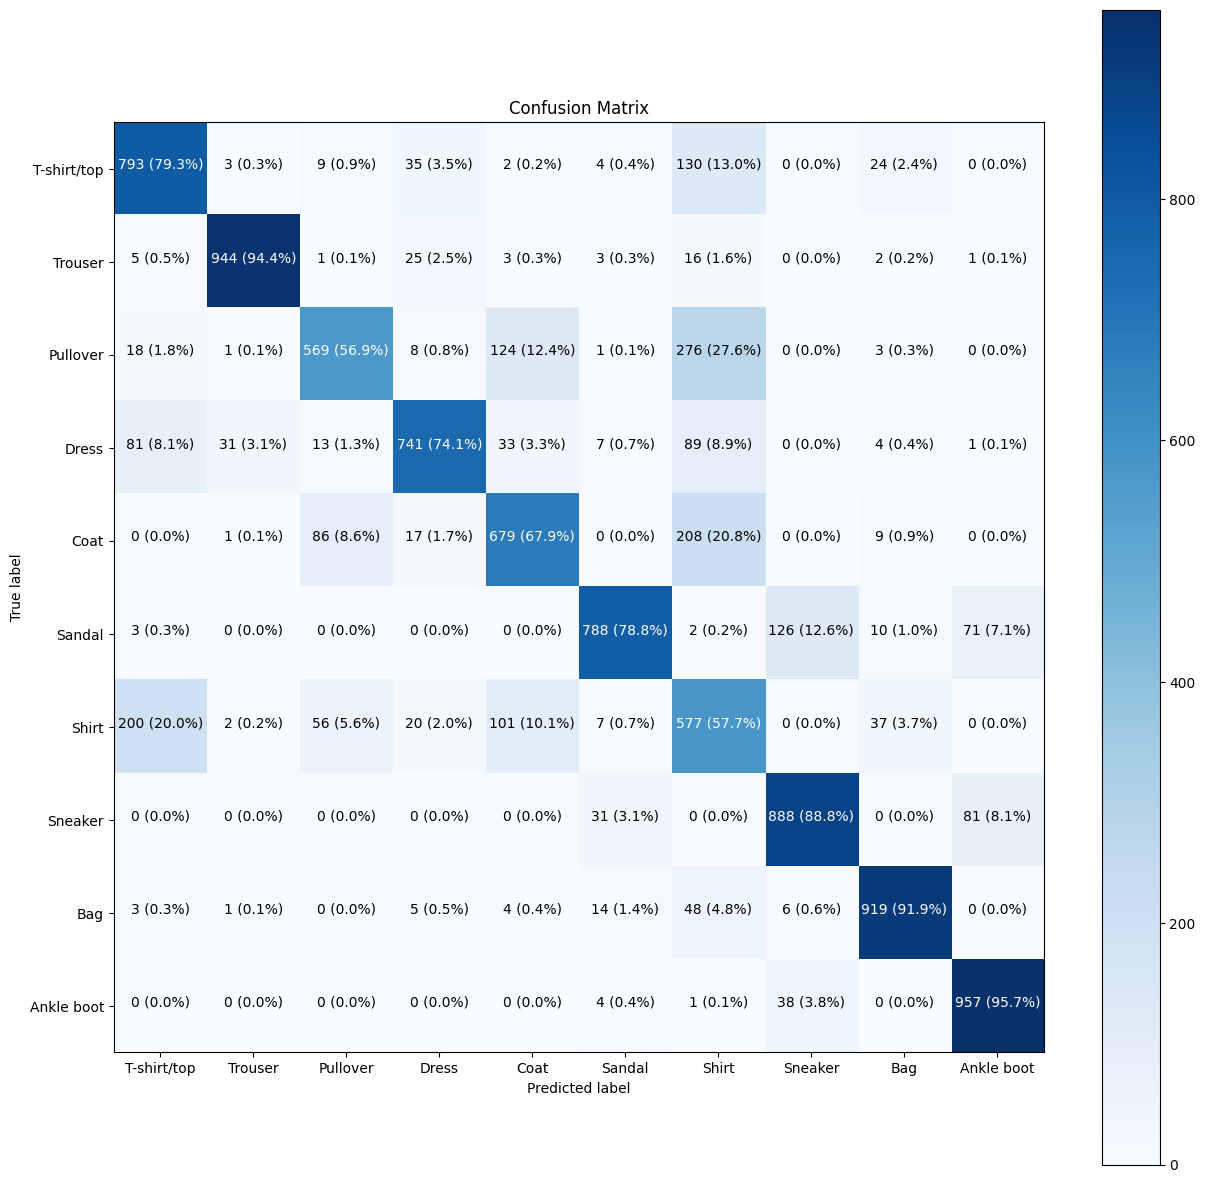

In [ ]:

# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)


In [ ]:

import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red



In [ ]:

# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

NameError: ignored